In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Plot parameters

In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 40,
          'figure.figsize': (20, 15),
          'axes.labelsize': 42,
          'axes.titlesize': 42,
          'xtick.labelsize': 42,
          'ytick.labelsize': 42}
pylab.rcParams.update(params)

In [3]:
def process_txt(dset, filename):
    data = np.loadtxt(filename + ".kcore.txt").astype(int)
    num_shells = max(data[:,1]) + 1
    dset[filename] = [[] for i in range(num_shells)]
    for line in data:
        dset[filename][line[1]].append(line[0])
        
    return dset

In [4]:
def autolabel(ax, rects, labels, thr):
    """
    Attach a text label next to a bar displaying a custom label
    """
    for i in range(len(rects)):
        width = rects[i].get_width()
        if width >= thr:
            ax.text(width + 10, rects[i].get_y() + rects[i].get_height() / 2.,
                    "{}".format(labels[i]),
                    ha='left', va='center')

In [19]:
dataset = {# B. mucosa
           "../Data/hmp/SRS015688": None,
           "../Data/hmp/SRS019794": None,
           "../Data/hmp/SRS014530": None,
           "../Data/hmp/SRS044001": None,
           "../Data/hmp/SRS015688_fil": None,
           "../Data/hmp/SRS019794_fil": None,
           "../Data/hmp/SRS014530_fil": None,
           "../Data/hmp/SRS044001_fil": None,
           "../Data/hmp/SRS015688_fil_uni": None,
           "../Data/hmp/SRS019794_fil_uni": None,
           "../Data/hmp/SRS014530_fil_uni": None,
           "../Data/hmp/SRS044001_fil_uni": None,
           # Fecal
           "../Data/hmp/SRS1041036": None,
           "../Data/hmp/SRS1041092": None,
           "../Data/hmp/SRS1041093": None,
           "../Data/hmp/SRS1054691": None,
           "../Data/hmp/SRS1041036_fil": None,
           "../Data/hmp/SRS1041092_fil": None,
           "../Data/hmp/SRS1041093_fil": None,
           "../Data/hmp/SRS1054691_fil": None,
           "../Data/hmp/SRS1041036_fil_uni": None,
           "../Data/hmp/SRS1041092_fil_uni": None,
           "../Data/hmp/SRS1041093_fil_uni": None,
           "../Data/hmp/SRS1054691_fil_uni": None,
           # External nasis
           "../Data/hmp/SRS016683": None,
           "../Data/hmp/SRS019372": None,
           "../Data/hmp/SRS076809": None,
           "../Data/hmp/SRS077646": None,
           "../Data/hmp/SRS016683_fil": None,
           "../Data/hmp/SRS019372_fil": None,
           "../Data/hmp/SRS076809_fil": None,
           "../Data/hmp/SRS077646_fil": None,
           "../Data/hmp/SRS016683_fil_uni": None,
           "../Data/hmp/SRS019372_fil_uni": None,
           "../Data/hmp/SRS076809_fil_uni": None,
           "../Data/hmp/SRS077646_fil_uni": None,
           # Gingiva
           "../Data/hmp/SRS015128": None,
           "../Data/hmp/SRS015128_fil": None,
           "../Data/hmp/SRS014524": None,
           "../Data/hmp/SRS014524_fil": None,
           "../Data/hmp/SRS016665": None,
           "../Data/hmp/SRS016665_fil": None,
           "../Data/hmp/SRS018691": None,
           "../Data/hmp/SRS018691_fil": None,
           "../Data/hmp/SRS148146": None,
           "../Data/hmp/SRS148146_fil": None,
           "../Data/hmp/SRS143014": None,
           "../Data/hmp/SRS143014_fil": None,
           "../Data/hmp/SRS015128_fil_uni": None,
           "../Data/hmp/SRS014524_fil_uni": None,
           "../Data/hmp/SRS016665_fil_uni": None,
           "../Data/hmp/SRS018691_fil_uni": None,
           "../Data/hmp/SRS148146_fil_uni": None,
           "../Data/hmp/SRS143014_fil_uni": None,
           "../Data/HMP4/HMP4": None,
           }

dataset_sizes = {}

for fname in dataset:
    dataset = process_txt(dataset, fname)
    
for fname in dataset:
    dataset_sizes[fname] = [len(core) for core in dataset[fname]]

In [20]:
for fname in dataset:
    print("Shells in {0}: {1}".format(fname, len(dataset[fname])))

Shells in ../Data/hmp/SRS015688: 100
Shells in ../Data/hmp/SRS019794: 176
Shells in ../Data/hmp/SRS014530: 307
Shells in ../Data/hmp/SRS044001: 158
Shells in ../Data/hmp/SRS015688_fil: 553
Shells in ../Data/hmp/SRS019794_fil: 218
Shells in ../Data/hmp/SRS014530_fil: 595
Shells in ../Data/hmp/SRS044001_fil: 1364
Shells in ../Data/hmp/SRS015688_fil_uni: 80
Shells in ../Data/hmp/SRS019794_fil_uni: 170
Shells in ../Data/hmp/SRS014530_fil_uni: 271
Shells in ../Data/hmp/SRS044001_fil_uni: 139
Shells in ../Data/hmp/SRS1041036: 75
Shells in ../Data/hmp/SRS1041092: 139
Shells in ../Data/hmp/SRS1041093: 79
Shells in ../Data/hmp/SRS1054691: 186
Shells in ../Data/hmp/SRS1041036_fil: 139
Shells in ../Data/hmp/SRS1041092_fil: 212
Shells in ../Data/hmp/SRS1041093_fil: 223
Shells in ../Data/hmp/SRS1054691_fil: 271
Shells in ../Data/hmp/SRS1041036_fil_uni: 74
Shells in ../Data/hmp/SRS1041092_fil_uni: 119
Shells in ../Data/hmp/SRS1041093_fil_uni: 78
Shells in ../Data/hmp/SRS1054691_fil_uni: 153
Shells i

In [21]:
dataset_violins = {}
for fname in dataset:
    cur = []
    dataset_sizes[fname][0] = 0
    for i in range(len(dataset_sizes[fname])):
        for j in range(dataset_sizes[fname][i]):
            cur.append(i)
    dataset_violins[fname] = cur

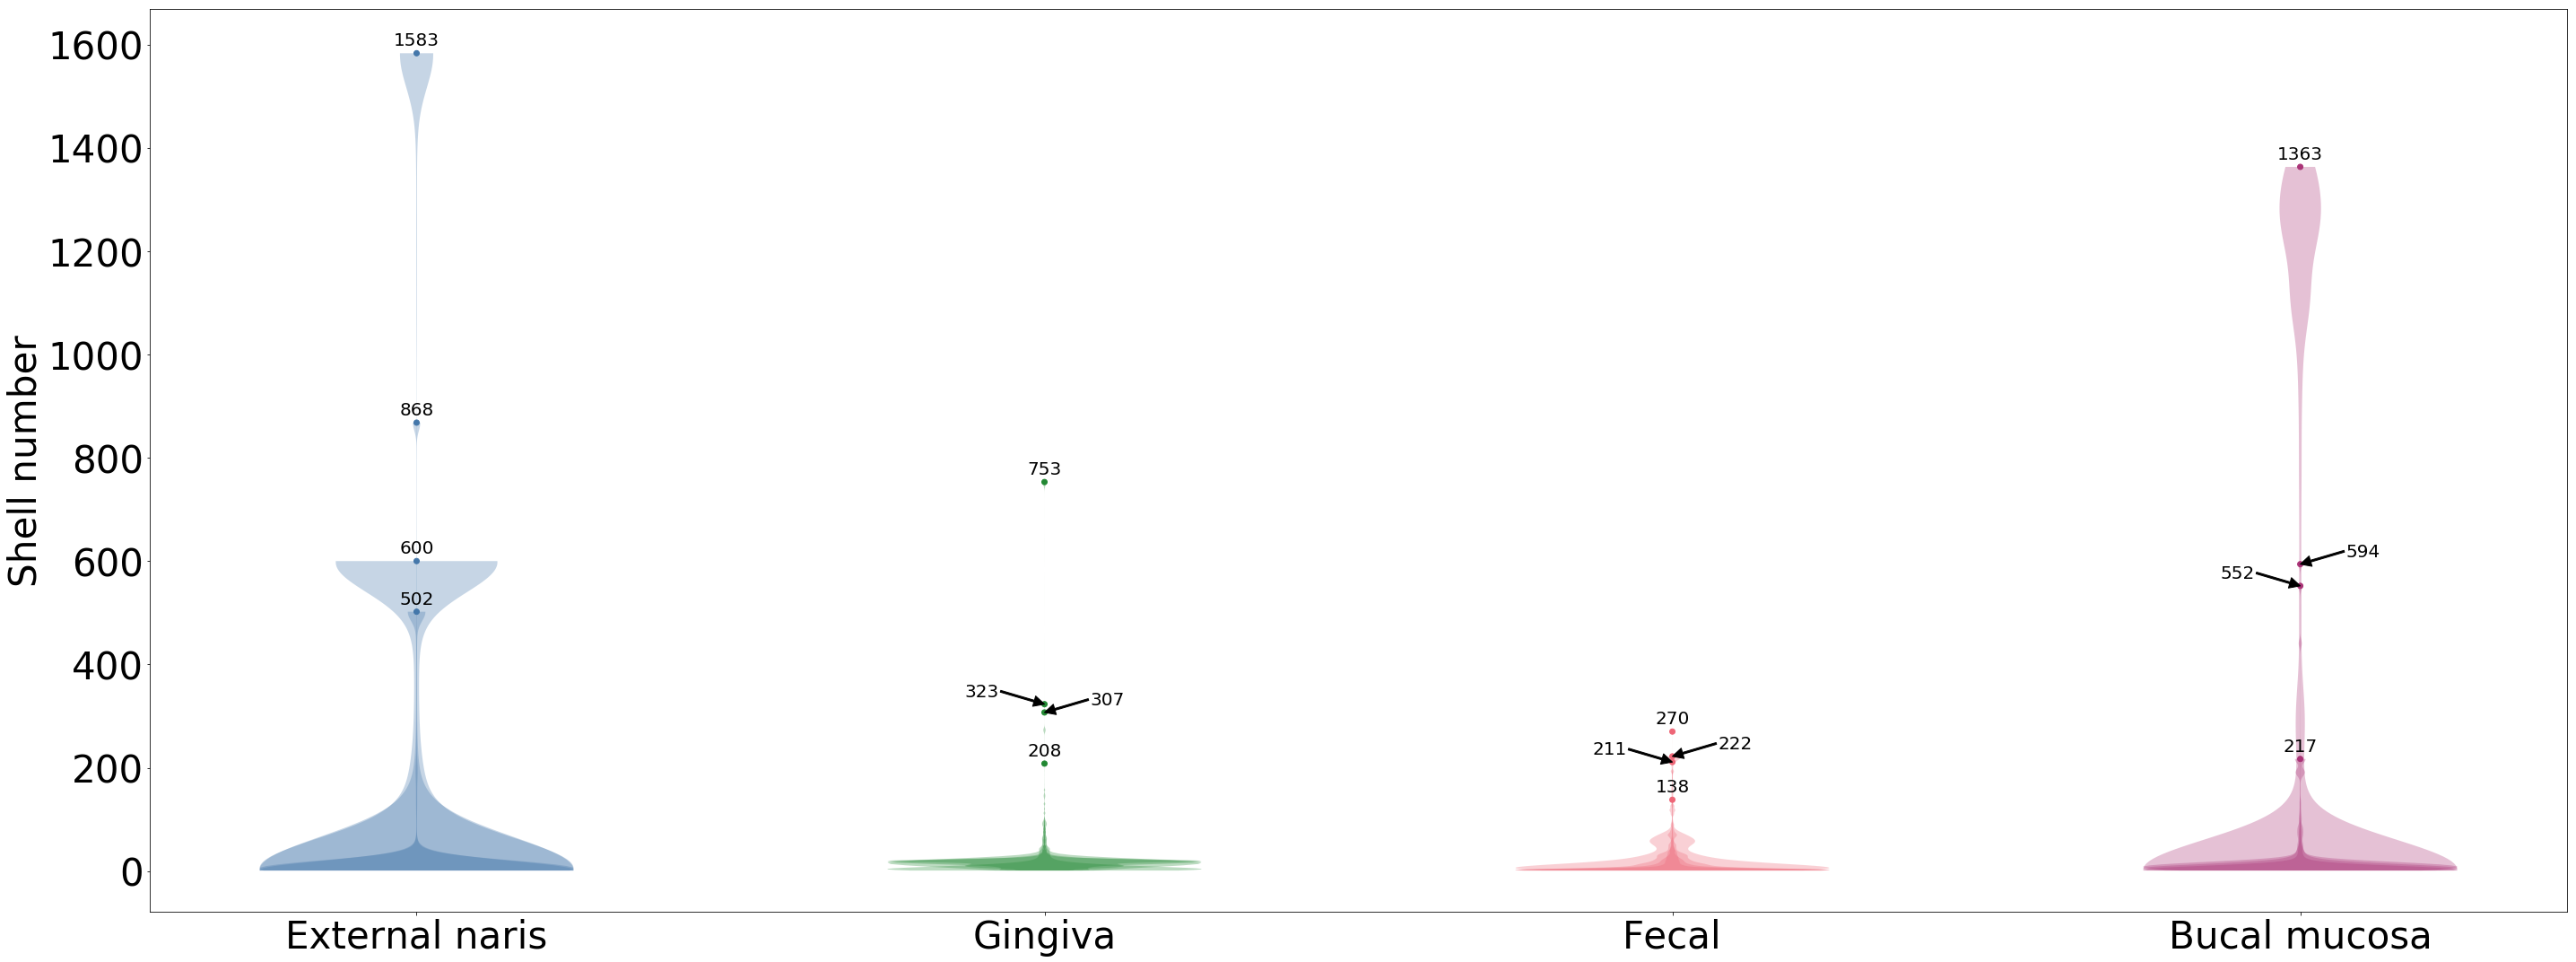

In [24]:
fig, axs = plt.subplots(figsize = (40,15))

maxShell = []

pos = [1, 1, 1, 1,
       2, 2, 2, 2,
       3, 3, 3, 3,
       4, 4, 4, 4]
# External nasis
data = []
fname = "../Data/hmp/SRS016683_fil"
data.append(dataset_violins[fname])
maxShell.append(np.max(dataset_violins[fname]))
fname = "../Data/hmp/SRS019372_fil"
data.append(dataset_violins[fname])
maxShell.append(np.max(dataset_violins[fname]))
fname = "../Data/hmp/SRS076809_fil"
data.append(dataset_violins[fname])
maxShell.append(np.max(dataset_violins[fname]))
fname = "../Data/hmp/SRS077646_fil"
data.append(dataset_violins[fname])
maxShell.append(np.max(dataset_violins[fname]))
# Gingiva
fname = "../Data/hmp/SRS014524_fil"
data.append(dataset_violins[fname])
maxShell.append(np.max(dataset_violins[fname]))
fname = "../Data/hmp/SRS016665_fil"
data.append(dataset_violins[fname])
maxShell.append(np.max(dataset_violins[fname]))
fname = "../Data/hmp/SRS018691_fil"
data.append(dataset_violins[fname])
maxShell.append(np.max(dataset_violins[fname]))
fname = "../Data/hmp/SRS015128_fil"
data.append(dataset_violins[fname])
maxShell.append(np.max(dataset_violins[fname]))
# Fecal
fname = "../Data/hmp/SRS1041092_fil"
data.append(dataset_violins[fname])
maxShell.append(np.max(dataset_violins[fname]))
fname = "../Data/hmp/SRS1041036_fil"
data.append(dataset_violins[fname])
maxShell.append(np.max(dataset_violins[fname]))
fname = "../Data/hmp/SRS1041093_fil"
data.append(dataset_violins[fname])
maxShell.append(np.max(dataset_violins[fname]))
fname = "../Data/hmp/SRS1054691_fil"
data.append(dataset_violins[fname])
maxShell.append(np.max(dataset_violins[fname]))
# Bucal mucosa
fname = "../Data/hmp/SRS015688_fil"
data.append(dataset_violins[fname])
maxShell.append(np.max(dataset_violins[fname]))
fname = "../Data/hmp/SRS019794_fil"
data.append(dataset_violins[fname])
maxShell.append(np.max(dataset_violins[fname]))
fname = "../Data/hmp/SRS014530_fil"
data.append(dataset_violins[fname])
maxShell.append(np.max(dataset_violins[fname]))
fname = "../Data/hmp/SRS044001_fil"
data.append(dataset_violins[fname])
maxShell.append(np.max(dataset_violins[fname]))

violins = axs.violinplot(data, pos, points=300, widths=0.5, showextrema = False)

for pc in violins['bodies'][0:4]:
    pc.set_facecolor('#4477AA')
for pc in violins['bodies'][4:8]:
    pc.set_facecolor('#228833')
for pc in violins['bodies'][8:12]:
    pc.set_facecolor('#EE6677')
for pc in violins['bodies'][12:]:
    pc.set_facecolor('#AA3377')

axs.scatter(pos, maxShell, color = ['#4477AA'] * 4 + 
                                   ['#228833'] * 4 + 
                                   ['#EE6677'] * 4 +
                                   ['#AA3377'] * 4)
    
axs.text(1, maxShell[0] + 25,
                    "{}".format(maxShell[0]),
                    ha='center', va='center', fontsize = 20)
axs.text(1, maxShell[1] + 25,
                    "{}".format(maxShell[1]),
                    ha='center', va='center', fontsize = 20)
axs.text(1, maxShell[2] + 25,
                    "{}".format(maxShell[2]),
                    ha='center', va='center', fontsize = 20)
axs.text(1, maxShell[3] + 25,
                    "{}".format(maxShell[3]),
                    ha='center', va='center', fontsize = 20)

axs.text(2, maxShell[4] + 25,
                    "{}".format(maxShell[4]),
                    ha='center', va='center', fontsize = 20)
axs.text(1.9, maxShell[5] + 25,
                    "{}".format(maxShell[5]),
                    ha='center', va='center', fontsize = 20)
axs.annotate("", xy = (2, maxShell[5]), xytext = (1.93, maxShell[5] + 25), color = "k",
                 arrowprops=dict(width=2,color='k'))
axs.text(2, maxShell[6] + 25,
                    "{}".format(maxShell[6]),
                    ha='center', va='center', fontsize = 20)
axs.text(2.1, maxShell[7] + 25,
                    "{}".format(maxShell[7]),
                    ha='center', va='center', fontsize = 20)
axs.annotate("", xy = (2, maxShell[7]), xytext = (2.07, maxShell[7] + 25), color = "k",
                 arrowprops=dict(width=2,color='k'))

axs.text(2.9, maxShell[8] + 25,
                    "{}".format(maxShell[8]),
                    ha='center', va='center', fontsize = 20)
axs.annotate("", xy = (3, maxShell[8]), xytext = (2.93, maxShell[8] + 25), color = "k",
                 arrowprops=dict(width=2,color='k'))
axs.text(3, maxShell[9] + 25,
                    "{}".format(maxShell[9]),
                    ha='center', va='center', fontsize = 20)
axs.text(3.1, maxShell[10] + 25,
                    "{}".format(maxShell[10]),
                    ha='center', va='center', fontsize = 20)
axs.annotate("", xy = (3, maxShell[10]), xytext = (3.07, maxShell[10] + 25), color = "k",
                 arrowprops=dict(width=2,color='k'))
axs.text(3, maxShell[11] + 25,
                    "{}".format(maxShell[11]),
                    ha='center', va='center', fontsize = 20)

axs.text(3.9, maxShell[12] + 25,
                    "{}".format(maxShell[12]),
                    ha='center', va='center', fontsize = 20)
axs.annotate("", xy = (4, maxShell[12]), xytext = (3.93, maxShell[12] + 25), color = "k",
                 arrowprops=dict(width=2,color='k'))
axs.text(4, maxShell[13] + 25,
                    "{}".format(maxShell[13]),
                    ha='center', va='center', fontsize = 20)
axs.text(4.1, maxShell[14] + 25,
                    "{}".format(maxShell[14]),
                    ha='center', va='center', fontsize = 20)
axs.annotate("", xy = (4, maxShell[14]), xytext = (4.07, maxShell[14] + 25), color = "k",
                 arrowprops=dict(width=2,color='k'))
axs.text(4, maxShell[15] + 25,
                    "{}".format(maxShell[15]),
                    ha='center', va='center', fontsize = 20)

plt.xticks([1, 2, 3, 4], ["External naris", "Gingiva", "Fecal", "Bucal mucosa"])
plt.ylabel("Shell number")
    
plt.tight_layout()
plt.savefig("shell-size-{}-hmp-violin-multi.png".format("4"),
            bbox_inches = "tight")
plt.show()

In [25]:
fig, axs = plt.subplots(figsize = (40,15))

maxShell = []

pos = [1, 1, 1, 1,
       2, 2, 2, 2,
       3, 3, 3, 3,
       4, 4, 4, 4]
# External nasis
data = []
fname = "../Data/hmp/SRS016683_fil"
data.append(dataset_violins[fname])
fname = "../Data/hmp/SRS019372_fil"
data.append(dataset_violins[fname])
fname = "../Data/hmp/SRS076809_fil"
data.append(dataset_violins[fname])
fname = "../Data/hmp/SRS077646_fil"
data.append(dataset_violins[fname])
# Gingiva
fname = "../Data/hmp/SRS014524_fil"
data.append(dataset_violins[fname])
fname = "../Data/hmp/SRS016665_fil"
data.append(dataset_violins[fname])
fname = "../Data/hmp/SRS018691_fil"
data.append(dataset_violins[fname])
fname = "../Data/hmp/SRS015128_fil"
data.append(dataset_violins[fname])
# Fecal
fname = "../Data/hmp/SRS1041092_fil"
data.append(dataset_violins[fname])
fname = "../Data/hmp/SRS1041036_fil"
data.append(dataset_violins[fname])
fname = "../Data/hmp/SRS1041093_fil"
data.append(dataset_violins[fname])
fname = "../Data/hmp/SRS1054691_fil"
data.append(dataset_violins[fname])
# Bucal mucosa
fname = "../Data/hmp/SRS015688_fil"
data.append(dataset_violins[fname])
fname = "../Data/hmp/SRS019794_fil"
data.append(dataset_violins[fname])
fname = "../Data/hmp/SRS014530_fil"
data.append(dataset_violins[fname])
fname = "../Data/hmp/SRS044001_fil"
data.append(dataset_violins[fname])

violins = axs.violinplot(data, pos, points=300, widths=0.5, showextrema = False)

for pc in violins['bodies'][0:4]:
    pc.set_facecolor('#4477AA')
for pc in violins['bodies'][4:8]:
    pc.set_facecolor('#228833')
for pc in violins['bodies'][8:12]:
    pc.set_facecolor('#EE6677')
for pc in violins['bodies'][12:]:
    pc.set_facecolor('#AA3377')

plt.xticks([], [])
plt.yticks(np.arange(0, 41, 5), np.arange(0, 41, 5), fontsize = 72)
    
plt.tight_layout()
cutoff = 40
plt.ylim((0,cutoff))
plt.savefig("shell-size-{}-hmp-violin-multi-{}-large-y.png".format("4", cutoff),
            bbox_inches = "tight")
plt.show()